In [1]:
import neusim as ns

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
sec=list()
for i in range(2):
    sec.append(ns.Section(L=1,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.7,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV
    sec.append(ns.Section(L=150,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.8,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV

In [4]:
N=ns.Neuron()


N.add_section(sec[0],0,1)
N.add_section(sec[1],1,2)
N.add_section(sec[2],2,3)
N.add_section(sec[3],3,4)

In [5]:
sec[0].add_channel_p(ns.channels.HeavysideCurrent(100,10,12),x = 0)

In [6]:
dx=2
atol=1e-09

In [7]:
#for s in sec:
    #s.add_channel_c(ns.channels.LeakChannel(0,28))# kΩ.cm2 (Migliore et al 2005) 28 kΩ.cm2

In [8]:
sec[0].add_channel_c(ns.channels.Hodgkin_Huxley())
sec[2].add_channel_c(ns.channels.Hodgkin_Huxley())

In [9]:
sec[1].add_channel_c(ns.channels.LeakChannel(0,28))
sec[3].add_channel_c(ns.channels.LeakChannel(0,28))

In [10]:
%env NUMBA_DISABLE_JIT 1

env: NUMBA_DISABLE_JIT=1


In [11]:
sim=ns.Simulation(N,dx,atol)
t_span =(0,30)
sim.run(t_span)

/home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/simulation.py:70: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "ode_function" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/simulation.py (98)

File "neusim/core/simulation.py", line 98:
    def ode_function(y,t,idV,idS,Cm,G,k_c,neuron):
        <source elided>

        V = y[idV]
        ^

  @jit
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "ode_function" was compiled in object mode without forceobj=True.

File "neusim/core/simulation.py", line 71:
    @jit
    def ode_function(y,t,idV,idS,Cm,G,k_c,neuron):
    ^

  self.func_ir.loc))
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation pa

/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "I" was compiled in object mode without forceobj=True.

File "neusim/channels.py", line 113:
    @jit
    def I(self,V,n,t):
    ^

  self.func_ir.loc))
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "neusim/channels.py", line 113:
    @jit
    def I(self,V,n,t):
    ^

  warnings.warn(errors.NumbaDeprecationWarning(msg, self.func_ir.loc))
/home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/model.py:161: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "I" failed type inference due to: 

/home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/model.py:176: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "dS" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/model.py (179)

File "neusim/core/model.py", line 179:
    def dS(self,V,S):
        <source elided>
        """return the differential of the state variables of the ion channels"""
        dS = np.zeros(S.shape)
        ^

  @jit
/home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/model.py:176: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "dS" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "neusim/core/model.py", line 180:
    def dS(self,V,S):
        <source elided>
        dS = np.zeros(S.shape)
        for channels in (se

In [ ]:
sim.G.toarray()

In [ ]:
sim.truc

In [ ]:
?ns.Simulation

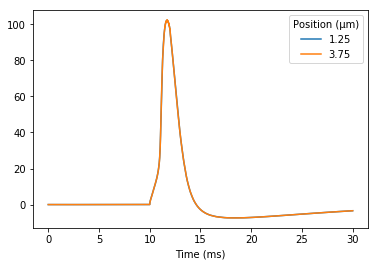

In [12]:
sim.V[0].loc[0:100,0::1].plot()

In [ ]:
sim.V[0].loc[:,0:30:20].plot()

In [ ]:
sim.V[0].loc[[0,20,100],:].T.plot()

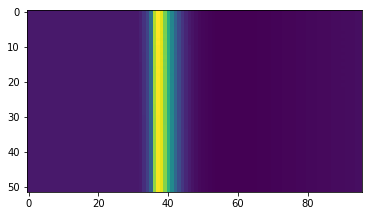

In [13]:
plt.imshow(sim.V.loc[0::5000,:].T)

In [ ]:
sim.